In [1]:
import h2o

#in virtual enviromnet (as Anaconda, manual strat-up h2o jar service)
#h2o jar position /home/francesco/anaconda3/lib/python3.6/site-packages/h2o/backend/bin
#with 3gb java -Xmx3g -jar /path/to/h2o.jar
#with hdfs support java -jar h2o.jar -hdfs_config core-site.xml
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,39 secs
H2O cluster timezone:,Europe/Rome
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.6
H2O cluster version age:,10 days
H2O cluster name:,francesco
H2O cluster total nodes:,1
H2O cluster free memory:,3.893 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [2]:
irisUrl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = h2o.import_file(irisUrl)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
data.col_names=['sepal_length','sepal_width','petal_length','petal_width','species']

In [4]:
data.describe()

Rows:150
Cols:5




,sepal_length,sepal_width,petal_length,petal_width,species
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.843333333333333,3.053999999999999,3.758666666666667,1.1986666666666665,
maxs,7.9,4.4,6.9,2.5,
sigma,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
y = 'species'
x = data.names # data.columns
x.remove(y)
train,test = data.split_frame(ratios=[0.8])

In [6]:
m = h2o.estimators.deeplearning.H2ODeepLearningEstimator()
m.train(x, y, train)
p = m.predict(test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [7]:
m

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1536052663236_1


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.16210208262280112
RMSE: 0.40261902913647923
LogLoss: 0.7328202312957685
Mean Per-Class Error: 0.19704319704319703
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
36.0,1.0,0.0,0.0270270,1 / 37
0.0,40.0,0.0,0.0,0 / 40
0.0,22.0,17.0,0.5641026,22 / 39
36.0,63.0,17.0,0.1982759,23 / 116


Top-3 Hit Ratios: 


k,hit_ratio
1,0.8017241
2,1.0
3,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2018-09-04 11:21:41,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2018-09-04 11:21:41,0.670 sec,289 obs/sec,1.0,1,116.0,0.6412179,1.6669734,0.3721546,0.5431034
,2018-09-04 11:21:42,1.144 sec,1344 obs/sec,10.0,10,1160.0,0.4026190,0.7328202,0.7524687,0.1982759


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
petal_width,1.0,1.0,0.2749441
petal_length,0.9331487,0.9331487,0.2565638
sepal_width,0.8724458,0.8724458,0.2398739
sepal_length,0.8315079,0.8315079,0.2286182


In [9]:
p.as_data_frame()

,predict,Iris-setosa,Iris-versicolor,Iris-virginica
0,Iris-setosa,9.602624e-01,0.039738,6.650258e-17
1,Iris-setosa,9.945979e-01,0.005402,1.361889e-17
2,Iris-setosa,9.902413e-01,0.009759,5.091820e-17
3,Iris-setosa,9.959036e-01,0.004096,3.620642e-17
4,Iris-setosa,9.947453e-01,0.005255,3.896815e-18
5,Iris-setosa,9.977429e-01,0.002257,7.486175e-18
6,Iris-setosa,9.586105e-01,0.041389,3.894072e-17
7,Iris-setosa,9.401845e-01,0.059816,2.151848e-15
8,Iris-setosa,9.481258e-01,0.051874,1.923371e-16
9,Iris-setosa,9.932156e-01,0.006784,3.943729e-17


In [12]:
(p['predict'] == test['species']).mean()

[0.8529411764705882]

## Performance Versus Predictions

In [13]:
m.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.12398925343261379
RMSE: 0.3521210778022437
LogLoss: 0.41172427117090676
Mean Per-Class Error: 0.15151515151515152
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
13.0,0.0,0.0,0.0,0 / 13
0.0,10.0,0.0,0.0,0 / 10
0.0,5.0,6.0,0.4545455,5 / 11
13.0,15.0,6.0,0.1470588,5 / 34


Top-3 Hit Ratios: 


k,hit_ratio
1,0.8529412
2,1.0
3,1.0


### DATA IMPORT EXAMPLES

In [16]:
datasets = "https://raw.githubusercontent.com/DarrenCook/h2o/bk/datasets/"
data = h2o.import_file(datasets + "iris.csv", col_names=["Sepal length", "Sepal width","Petal length", "Petal width", "Species"],
                       col_types=["numeric", "numeric", "numeric", "numeric", "enum"], destination_frame='iris')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
data

Sepal length,Sepal width,Petal length,Petal width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


### ASSIGN DATAFRAME NAME

In h2o every operation returns a new dtaframe, with a random name in h2o cluster. For avoiding name misleading the suggestion is change the name every time is possible.

In [19]:
datasets = "https://raw.githubusercontent.com/DarrenCook/h2o/bk/datasets/"
data = h2o.import_file(datasets + "iris_wheader.csv")
data.frame_id #iris_wheader.hex
data = data[:,1:] #Drop column 0. Keep column 1 onwards.
data.frame_id #py_2_sid_88fe
data = h2o.assign(data, "iris")
data.frame_id #iris
h2o.ls() #iris and iris_wheader.hex, no py_2_sid_88fe
h2o.remove("iris_wheader.hex")
h2o.ls() #Just lists iris

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
h2o.ls()

,key
0,DeepLearning_model_python_1536052663236_1
1,_bec1058adc4cab153c359e1e179c4603
2,iris
3,iris.hex
4,iris_data.hex
5,modelmetrics_DeepLearning_model_python_1536052...
6,modelmetrics_DeepLearning_model_python_1536052...
7,part_00000_ef30b879_acac_4a28_a871_7a613d5e525...
8,predictions_9af5_DeepLearning_model_python_153...
9,py_13_sid_941c


In [48]:
data.describe()

Rows:150
Cols:7




,sepal_wid,petal_len,petal_wid,class,ratio,islong,species
type,real,real,real,enum,real,int,string
mins,2.0,1.2,0.1,,0.02439024390243903,0.0,NaN
mean,3.053999999999999,4.5104,1.1986666666666665,,0.41155312214749035,0.62,NaN
maxs,4.4,8.28,2.5,,0.8846153846153845,1.0,NaN
sigma,0.43359431136217375,2.117304503942715,0.7631607417008414,,0.2623037386434534,0.487012533774739,NaN
zeros,0,0,0,,0,57,0
missing,0,0,0,0,0,0,0
0,3.5,1.68,0.2,Iris-setosa,0.05714285714285715,0.0,setosa
1,3.0,1.68,0.2,Iris-setosa,0.06666666666666667,0.0,setosa
2,3.2,1.56,0.2,Iris-setosa,0.0625,0.0,setosa


In [22]:
data.quantile()

Probs,sepal_widQuantiles,petal_lenQuantiles,petal_widQuantiles,classQuantiles
0.01,2.2,1.149,0.1,nan
0.1,2.5,1.4,0.2,nan
0.25,2.8,1.6,0.3,nan
0.333,2.9,2.5787,0.8468,nan
0.5,3,4.35,1.3,nan
0.667,3.2,4.9,1.6,nan
0.75,3.3,5.1,1.8,nan
0.9,3.61,5.8,2.2,nan
0.99,4.151,6.7,2.5,nan


In [23]:
data.levels()

[[], [], [], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']]

### OPERATION ON COLUMNS

In [26]:
data['petal_len'] = data['petal_len'] * 1.2

data["ratio"] = data["petal_wid"] / data["sepal_wid"]
data["petal_len"].sd() #2.117
data["ratio"].cor(data["petal_len"]) #0.956

0.9557785904293422

The next example creates a new numeric column that is 1 when the petal length is
greater than average, and 0 everywhere else. The syntax is something that evaluates to
a boolean, followed by ifelse(if_true, if_false) :

In [37]:
data["islong"] = (data["petal_len"] > data["petal_len"].mean()[0]).ifelse(1,0)

In [32]:
data = h2o.assign(data, "iris")

In [34]:
data['species'] = data['class'].ascharacter().gsub("Iris-", "")

In [38]:
data

sepal_wid,petal_len,petal_wid,class,ratio,islong,species
3.5,1.68,0.2,Iris-setosa,0.0571429,0,setosa
3,1.68,0.2,Iris-setosa,0.0666667,0,setosa
3.2,1.56,0.2,Iris-setosa,0.0625,0,setosa
3.1,1.8,0.2,Iris-setosa,0.0645161,0,setosa
3.6,1.68,0.2,Iris-setosa,0.0555556,0,setosa
3.9,2.04,0.4,Iris-setosa,0.102564,0,setosa
3.4,1.68,0.3,Iris-setosa,0.0882353,0,setosa
3.4,1.8,0.2,Iris-setosa,0.0588235,0,setosa
2.9,1.68,0.2,Iris-setosa,0.0689655,0,setosa
3.1,1.8,0.1,Iris-setosa,0.0322581,0,setosa


### Aggregation

In [55]:
data.group_by("class").count().mean("petal_len").sum("islong").get_frame()

class,nrow,mean_petal_len,sum_islong
Iris-setosa,50,1.7568,0
Iris-versicolor,50,5.112,43
Iris-virginica,50,6.6624,50


/home/francesco/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


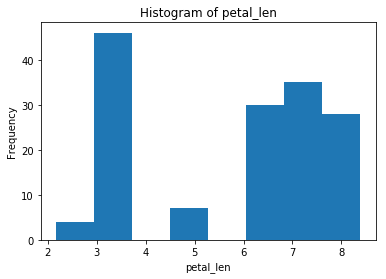

In [64]:
data["petal_len"].hist()

### Indexing

In [57]:
d = data.as_data_frame()
d.info() #Describes the pandas DataFrame internals
d.corr(method="spearman").round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
sepal_wid    150 non-null float64
petal_len    150 non-null float64
petal_wid    150 non-null float64
class        150 non-null object
ratio        150 non-null float64
islong       150 non-null int64
species      150 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


,sepal_wid,petal_len,petal_wid,ratio,islong
sepal_wid,1.00,-0.30,-0.28,-0.44,-0.47
petal_len,-0.30,1.00,0.94,0.90,0.84
petal_wid,-0.28,0.94,1.00,0.97,0.84
ratio,-0.44,0.90,0.97,1.00,0.82
islong,-0.47,0.84,0.84,0.82,1.00


### Split data

In [58]:
train, test, valid = data.split_frame([0.6,0.2]) # The last value is implict complementary to 1

You can do amnual split too. Manual split use arrays index to fetch the data from original dataframe. Usefull for assigned set's dimensions or for timeseries. It slower than H2O's split library function.

### ROW AND COLUMNS
Tou can bind different dataframe with dataframe.cbinr (for column) dataframe.rbind(df) for row or df.merge(df) for sql-like join. They are lazy operations, take effect (they are effectibly calculated) when an action will be taken (like in spark)

In [60]:
prices = h2o.H2OFrame({
'petal_len':[2, 3, 4, 5],
'price':[4, 5.5, 8, 10]
})

#the merge is possible only on int column
data["petal_len"] = data["petal_len"].round()
iris_prices = data.merge(prices)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Rows:83
Cols:8




,petal_len,sepal_wid,petal_wid,class,ratio,islong,species,price
type,int,real,real,enum,real,int,string,int
mins,2.0,2.0,0.1,,0.02439024390243903,0.0,NaN,4.0
mean,3.253012048192771,3.093975903614458,0.7072289156626504,,0.25249317299106444,0.3614457831325301,NaN,6.506024096385542
maxs,5.0,4.4,1.7,,0.6818181818181818,1.0,NaN,10.0
sigma,1.4300210939428002,0.5032454178944855,0.5341469452816217,,0.20696607815442428,0.4833398353280309,NaN,2.8600421878856004
zeros,0,0,0,,0,53,0,0
missing,0,0,0,0,0,0,0,0
0,2.0,3.5,0.2,Iris-setosa,0.05714285714285715,0.0,setosa,4.0
1,2.0,3.0,0.2,Iris-setosa,0.06666666666666667,0.0,setosa,4.0
2,2.0,3.2,0.2,Iris-setosa,0.0625,0.0,setosa,4.0


/home/francesco/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


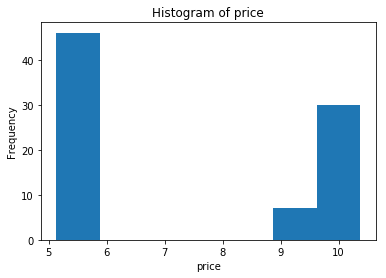

In [63]:
iris_prices.describe()
iris_prices['price'].hist()